In [1]:
import sys
import os


# Get the root directory of the project
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the root directory to the system path
sys.path.insert(0, project_root)

# Now you can import watermarking.utils
import watermarking.utils as utils

In [2]:
import pandas as pd 
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [3]:
def skip_file(filename, filters):
    # File must contain all filters to be processed
    for f in filters:
        if f not in filename:
            return True
    return False

def get_data(data_dir, filters):
    data = []
    for file in os.listdir(os.path.join("../data/output/", data_dir)):
        if skip_file(file, filters):
            continue
            
        print(file)
        filename = os.path.join("../data/output/", data_dir, file)
        with open(filename) as f:
            file_data = f.read()
            all_data = json.loads(file_data)
            data.append(all_data)
    return [row for each_list in data for row in each_list]

def label_keys(df):
    unique_keys = df["generated_watermark_key"].unique().tolist()
    unique_labels = [chr(ord("A") + x) for x in range(len(unique_keys))]
    # Create following dict: {"key1": "A", "key2": "B", ...}
    key_label_dict = {k: v for k, v in zip(unique_keys, unique_labels)}
    
    for column_name in "generated_watermark_key", "detected_watermark_key":
        df[column_name + "_label"] = df[column_name].apply(lambda x: key_label_dict.get(x, None))
    return df 

def get_df(data_dir, *filters):
    data = get_data(data_dir, filters)
    df = pd.DataFrame(data)
    df = df.rename(columns={"detected_seed": "detected_watermark_key", 
                       "generated_seed": "generated_watermark_key"}
                  )
    return df

df = label_keys(get_df("different_keys_1000_detected", "czech"))
df

czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:13:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:46:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:08:48.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:41:17.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:51:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:36:11.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:18:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:03:01.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_19:56:50.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_20:29:55.json


,z_score,p_value,error,generated_green_list_size,generated_wm_strength,generated_watermark_key,detected_green_list_size,detected_wm_strength,detected_watermark_key,generated_grSSSeen_list_size,generated_watermark_key_label,detected_watermark_key_label
0,16.211786,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
1,18.443793,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
2,12.963168,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
3,18.704052,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
4,16.245539,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13.457356,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99996,10.328783,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99997,14.332286,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99998,15.385755,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J


In [4]:


def plot_boxplot(df, title=""):
    plt.figure(figsize=(12, 4)) 
    df = df.sort_values(by=['detected_watermark_key_label', 'generated_watermark_key_label'])
    ax = sns.boxplot(df, x="detected_watermark_key_label", y="z_score", hue="generated_watermark_key_label",
               showfliers=False)
    ax.set_xlabel("detected with key")
    ax.set_title(title)
    ax.legend(title="generated with key")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    
    filename = title.replace(" ", "_") + ".pdf"
    
    plt.tight_layout()
    # Save the figure to a PDF
    plt.savefig(f"../figures/{filename}", format="pdf")


# Task 1: Detection with different keys 

## Dataset: Capek and stories

In [5]:
# Commented 1000 size datasets
# plot_boxplot(label_keys(get_df("different_keys_1000_detected","czech", "UnigramWatermarkedLLM")))
# plot_boxplot(label_keys(get_df("different_keys_1000_detected", "english", "UnigramWatermarkedLLM")))
# plot_boxplot(label_keys(get_df("different_keys_1000_detected", "english", "GumbelNGramWatermarkedLLM", "tau_0.2")))
# plot_boxplot(label_keys(get_df("different_keys_1000_detected", "english", "GumbelNGramWatermarkedLLM", "tau_0.3")))

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_1.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_4.json


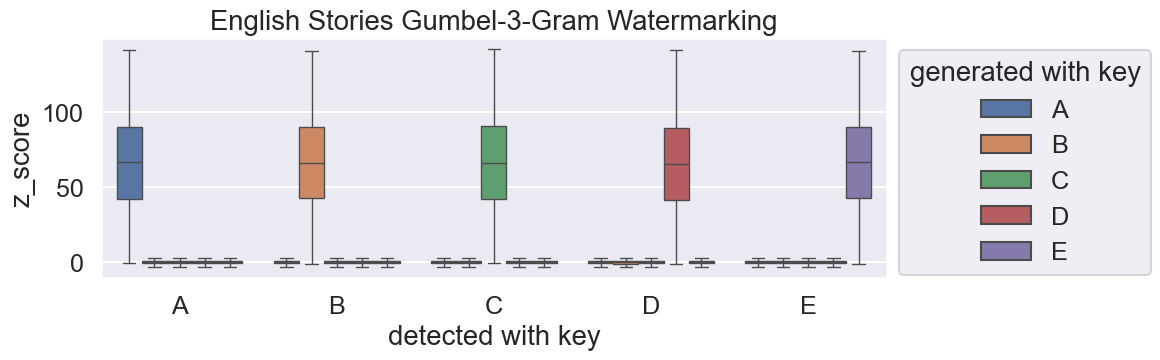

In [6]:
sns.set_context("talk", font_scale=1.1)
plot_boxplot(
    label_keys((get_df("different_keys_detected", "english", "GumbelNGramWatermarkedLLM"))), 
    title="English Stories Gumbel-3-Gram Watermarking"
)

In [21]:
df = label_keys(get_df("different_keys_detected", "english", "GumbelNGramWatermarkedLLM", "repeat_0.json"))

import json
with open("../data/output/different_keys/english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json") as f:
    data = json.load(f)
    data = data['data']

matching_df = df[df["detected_watermark_key_label"] == df["generated_watermark_key_label"]]
for idx in matching_df[matching_df['z_score'] < 1].index:
    print(data[idx]['generated'])


english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json
her to the north.
 miles too far to the north.
range.
2012...... 4 5 6 7 8 9 10 11 12 13
ork-in no. 2.
ivided by entrances.
al Park was declared a World Heritage Site by UNESCO in 1979.
la. The Tikal National Park was declared a UNESCO World Heritage Site in 1979.
w action as well.
ine with 59 laps to go.
among the best players in England.
Ice Nymphs.
f September 25, 2011.
ral release on September 2, 2011.
s on May 1, 2007.
o 49-year-olds, and 11% of all 18- to 49-year-olds watching television at the time of the broadcast.
ck. Description above from the Wikipedia article Rakie Ayola, licensed under CC-BY-SA, full list of contributors on Wikipedia.
 help build a town.
on the UK singles chart.
temala. The Tikal National Park was declared a UNESCO World Heritage Site in 1979.
sed in 2011.


Index(['z_score', 'p_value', 'error', 'generated_class_name',
       'generated_model_name', 'generated_watermark_key', 'generated_seeding',
       'generated_hash_key', 'generated_ngram', 'generated_tau',
       'generated_shift_max', 'generated_drop_prob', 'detected_class_name',
       'detected_model_name', 'detected_watermark_key', 'detected_seeding',
       'detected_hash_key', 'detected_ngram', 'detected_tau',
       'detected_shift_max', 'detected_drop_prob',
       'generated_watermark_key_label', 'detected_watermark_key_label'],
      dtype='object')

czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_4.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_3.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_2.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_1.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json


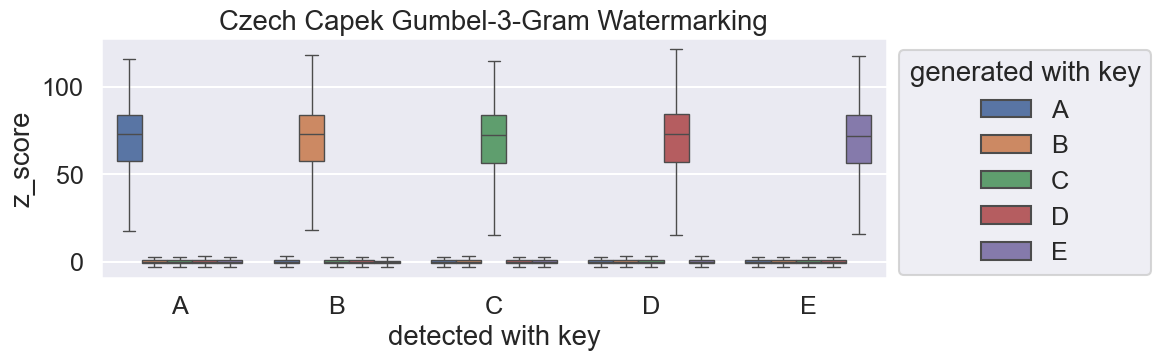

In [8]:
plot_boxplot( 
    label_keys(get_df("different_keys_detected", "czech", "GumbelNGramWatermarkedLLM")), 
    title="Czech Capek Gumbel-3-Gram Watermarking"
)

## Dataset: Squad 

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~~repeat_1~repeat_2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~~repeat_1.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~~repeat_1~repeat_2~repeat_3~repeat_4.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~~repeat_1~repeat_2~repeat_3.json


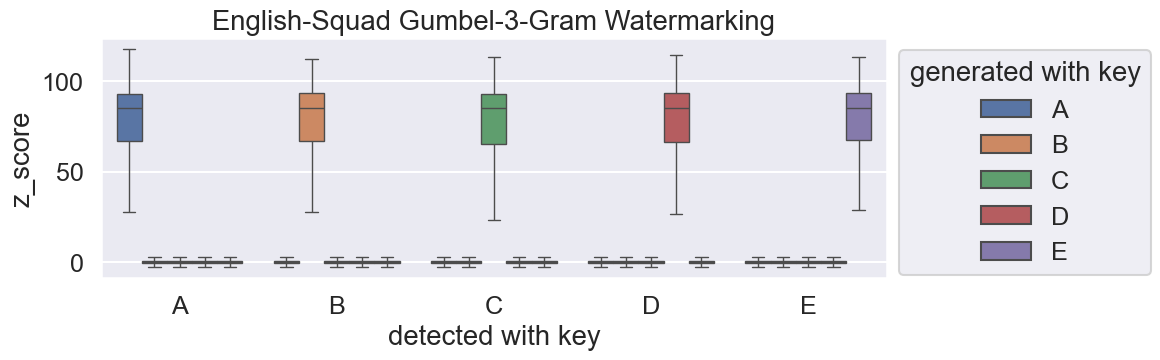

In [9]:
plot_boxplot(
    label_keys(get_df("different_keys_squad_detected", "english", "GumbelNGramWatermarkedLLM")),
    title="English-Squad Gumbel-3-Gram Watermarking"
)

czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_4.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_3.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_2.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_1.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json


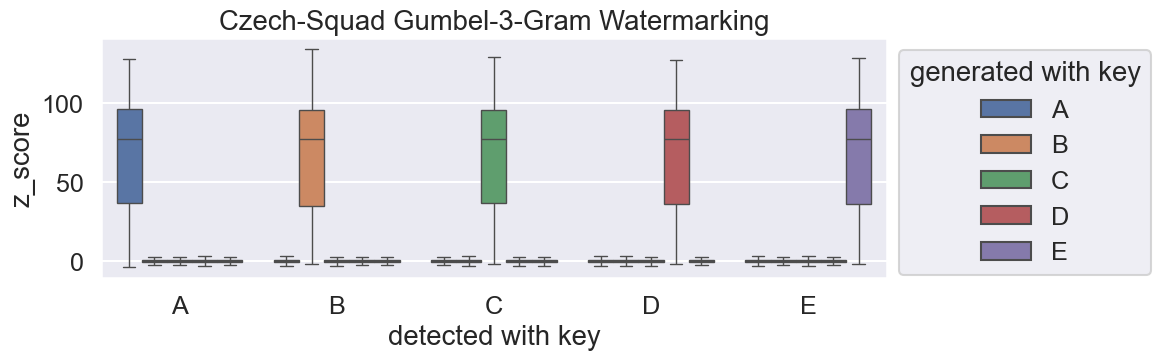

In [10]:
plot_boxplot(
    label_keys(get_df("different_keys_squad_detected", "czech", "GumbelNGramWatermarkedLLM")),
    title="Czech-Squad Gumbel-3-Gram Watermarking"
)

# Task 2: Detection with multiple models

In [14]:
def remove_model_name_prefix(model_name):
    valid_hface_prefixes = ['BUT-FIT', 'meta-llama', 'mistralai', 'google']
    for valid_hface_prefix in valid_hface_prefixes:
        if valid_hface_prefix in model_name:
            return model_name.removeprefix(valid_hface_prefix + '-')
    raise ValueError(
        f"Model name '{model_name}' does not match with any specified prefixes {valid_hface_prefixes}"
    )
    

def plot_boxplot(df, title):
    df['generated_model_name'] = df['generated_model_name'].apply(remove_model_name_prefix)
    df['detected_model_name'] = df['detected_model_name'].apply(remove_model_name_prefix)
    df['detected_model_name'] = df['detected_model_name'].apply(lambda x: x.removesuffix("-Instruct-2410"))
    df['generated_model_name'] = df['generated_model_name'].apply(lambda x: x.removesuffix("-Instruct-2410"))
        
    plt.figure(figsize=(12, 4)) 
    df = df.sort_values(by=['generated_model_name', 'detected_model_name'])
    ax = sns.boxplot(df, x="generated_model_name", y="z_score", hue="detected_model_name",
               showfliers=False)
    ax.set_xlabel("generated model name")
    ax.set_title(title)
    ax.legend(title="detected model name")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    
    filename = title.replace(" ", "_") + ".pdf"
    
    # Save the figure to a PDF
    plt.tight_layout()
    plt.savefig(f"../figures/{filename}", format="pdf")

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~.json
english~meta-llama-Llama-3.2-3B~GumbelNGramWatermarkedLLM~.json
english~mistralai-Ministral-8B-Instruct-2410~GumbelNGramWatermarkedLLM~.json
english~mistralai-Mistral-7B-v0.3~GumbelNGramWatermarkedLLM~.json


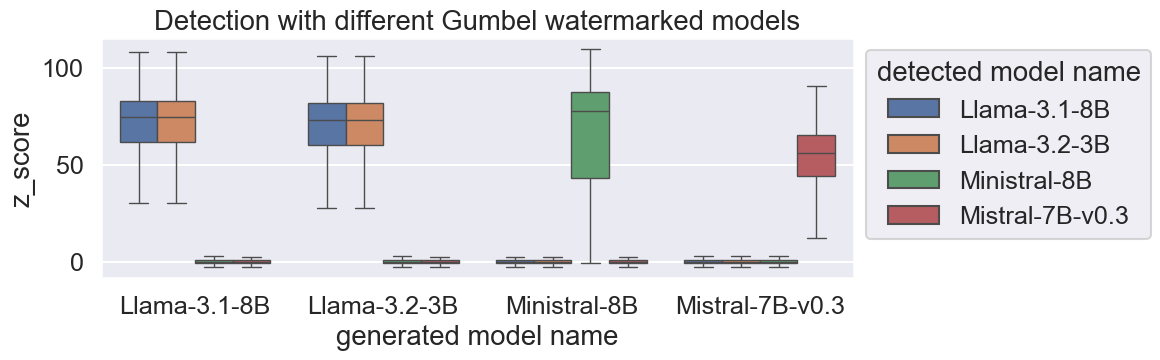

In [17]:
df = get_df("different_models_detected", "GumbelNGramWatermarkedLLM")
df = df[~df['detected_model_name'].str.contains('gemma', na=False)]
plot_boxplot(
    df,
    title="Detection with different Gumbel watermarked models"
)


english~mistralai-Ministral-8B-Instruct-2410~UnigramWatermarkedLLM~.json
english~mistralai-Mistral-7B-v0.3~UnigramWatermarkedLLM~.json
english~meta-llama-Llama-3.2-3B~UnigramWatermarkedLLM~.json
english~meta-llama-Llama-3.1-8B~UnigramWatermarkedLLM~.json


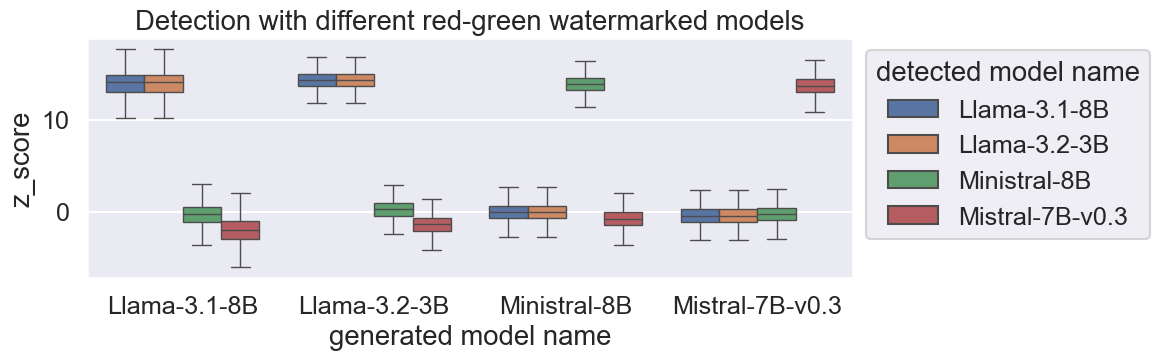

In [23]:
df = get_df("different_models_detected", "Unigram")
df = df[~df['detected_model_name'].str.contains('gemma', na=False)]
plot_boxplot(
    df,
    title="Detection with different red-green watermarked models"
)

In [27]:
df["generated_token_len"].mean()

388.580534301647